In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
# 정규분포
x = tf.random.normal(shape=(3,1), mean=0 ,stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.4528988],
       [-1.4886636],
       [ 1.4578493]], dtype=float32)>

In [4]:
# 균등분포 정보를 생성
x = tf.random.uniform(shape=(3,1), minval=0, maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.6469395 ],
       [0.56903803],
       [0.95241094]], dtype=float32)>

In [5]:
# 텐서플로 변수
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
v                

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0536685 ],
       [-1.3245105 ],
       [-0.12192196]], dtype=float32)>

In [6]:
# 값을 할당
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 3.        ],
       [-1.3245105 ],
       [-0.12192196]], dtype=float32)>

In [7]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 4.        ],
       [-0.32451046],
       [ 0.87807804]], dtype=float32)>

In [8]:
# 기본적인 텐서 연산
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d
a,b,c,d,e

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[4., 4.],
        [4., 4.]], dtype=float32)>)

In [9]:
# y = 3x-2
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape=(10,))
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.20943771,  1.2746525 ,  1.213214  , -0.17576954,  1.876984  ,
        0.16379917,  1.082245  ,  0.6199966 , -0.4440221 ,  1.3048344 ],
      dtype=float32)>

In [10]:
y = 3*x-2
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-2.628313  ,  1.8239574 ,  1.6396422 , -2.5273085 ,  3.630952  ,
       -1.5086025 ,  1.2467351 , -0.14001012, -3.3320663 ,  1.9145031 ],
      dtype=float32)>

In [11]:
# MES
def cal_mes(x,y,w,b):
    y_pred = x*w+b
    squared_error = (y_pred - y)**2
    mean_squared_error = tf.reduce_mean(squared_error)
    return mean_squared_error

In [12]:
w = tf.Variable(0.0)
b = tf.Variable(0.0)
EPOCH=200
for epoch in range(1,EPOCH+1):
    with tf.GradientTape() as tape:
        mse = cal_mes(x,y,w,b)
    grad = tape.gradient(mse,{'w':w,'b':b} )
    dw,db = grad['w'], grad['b']
    w.assign_sub(dw * 0.01)
    b.assign_sub(db * 0.01)
    if epoch % 20 == 0:
        print(f"epoch:{epoch} loss:{mse:.2f} w:{float(w):.2f} b{float(b):.2f}")

epoch:20 loss:3.50 w:0.57 b-0.06
epoch:40 loss:2.55 w:0.98 b-0.22
epoch:60 loss:1.91 w:1.28 b-0.39
epoch:80 loss:1.45 w:1.53 b-0.57
epoch:100 loss:1.10 w:1.72 b-0.74
epoch:120 loss:0.84 w:1.89 b-0.90
epoch:140 loss:0.64 w:2.04 b-1.03
epoch:160 loss:0.49 w:2.16 b-1.15
epoch:180 loss:0.37 w:2.27 b-1.26
epoch:200 loss:0.28 w:2.36 b-1.35


In [13]:
# 텐서플로 선형 분류기
import numpy as np

In [14]:
num_sample_per_class = 1000
negative_sample = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_sample_per_class
)
positive_sample = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_sample_per_class
)
negative_sample,positive_sample

(array([[ 0.24891874,  2.71074332],
        [ 0.4777434 ,  3.78559857],
        [-1.34171888,  1.79462845],
        ...,
        [-0.652939  ,  3.23954228],
        [-1.12360707,  3.13982053],
        [ 0.45235074,  3.50721703]]),
 array([[ 3.47045889,  0.08815583],
        [ 2.84660802, -1.2522286 ],
        [ 1.85825951,  0.37721551],
        ...,
        [ 4.06788275,  0.55054017],
        [ 1.8205239 , -0.71988237],
        [ 3.431405  ,  0.38224107]]))

In [15]:
negative_sample.shape

(1000, 2)

In [16]:
inputs = np.vstack((negative_sample, positive_sample))
inputs.shape

(2000, 2)

In [17]:
targets = np.vstack((np.zeros((num_sample_per_class,1)), np.ones((num_sample_per_class,1))  ) )
targets.shape

(2000, 1)

In [18]:
np.zeros((num_sample_per_class,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

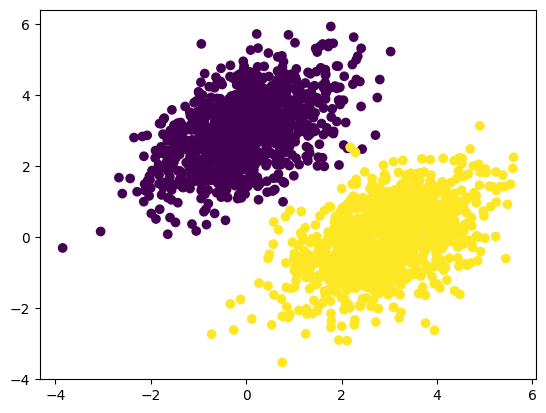

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [20]:
# 이진분류기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [21]:
type(tf.Variable(inputs)), type(W)

(tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [22]:
# forward
def model(inputs):
    return inputs@W + b
    # return tf.matmul(inputs.astype('float32'),W) + b

In [23]:
# 손실함수 MSE
def squred_loss(target, predict):
    return tf.reduce_mean( tf.square(target-predict))

In [24]:
# 훈련함수. 자동미분
learning_rate = 1e-2
def traning_step(inputs, target):
    with tf.GradientTape() as tape:
        predict = model(inputs)
        loss = squred_loss(target,predict)
    gradient_w, gradient_b = tape.gradient(loss,[W,b])
    W.assign_sub(gradient_w*learning_rate)
    b.assign_sub(gradient_b*learning_rate)
    return loss

In [25]:
# 훈련
EPOCHS = 100
for epoch in range(1,EPOCHS+1):
    loss = traning_step(inputs, targets)    
    print(f"epoch:{epoch} loss:{loss:.2f}")

epoch:1 loss:1.48
epoch:2 loss:1.17
epoch:3 loss:0.93
epoch:4 loss:0.74
epoch:5 loss:0.60
epoch:6 loss:0.49
epoch:7 loss:0.41
epoch:8 loss:0.34
epoch:9 loss:0.29
epoch:10 loss:0.25
epoch:11 loss:0.22
epoch:12 loss:0.20
epoch:13 loss:0.18
epoch:14 loss:0.17
epoch:15 loss:0.16
epoch:16 loss:0.15
epoch:17 loss:0.14
epoch:18 loss:0.13
epoch:19 loss:0.13
epoch:20 loss:0.12
epoch:21 loss:0.12
epoch:22 loss:0.12
epoch:23 loss:0.12
epoch:24 loss:0.11
epoch:25 loss:0.11
epoch:26 loss:0.11
epoch:27 loss:0.11
epoch:28 loss:0.11
epoch:29 loss:0.11
epoch:30 loss:0.11
epoch:31 loss:0.11
epoch:32 loss:0.11
epoch:33 loss:0.10
epoch:34 loss:0.10
epoch:35 loss:0.10
epoch:36 loss:0.10
epoch:37 loss:0.10
epoch:38 loss:0.10
epoch:39 loss:0.10
epoch:40 loss:0.10
epoch:41 loss:0.10
epoch:42 loss:0.10
epoch:43 loss:0.10
epoch:44 loss:0.10
epoch:45 loss:0.10
epoch:46 loss:0.10
epoch:47 loss:0.09
epoch:48 loss:0.09
epoch:49 loss:0.09
epoch:50 loss:0.09
epoch:51 loss:0.09
epoch:52 loss:0.09
epoch:53 loss:0.09
ep

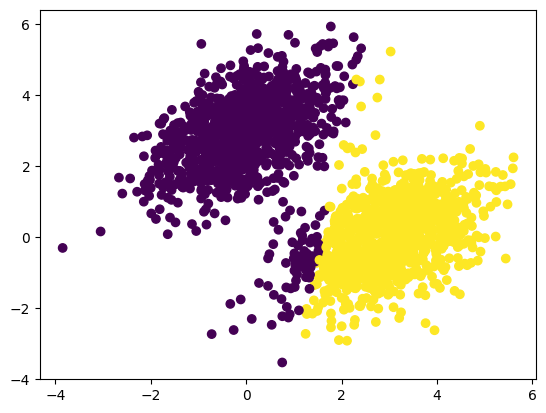

In [27]:
predict = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predict[:,0]>0.5)
plt.show()

In [28]:
# 분류기 라인 그리기
inputs[:,0].min(), inputs[:,0].max()

(-3.848934320067113, 5.6061240065895905)

In [29]:
start = float(W[0])*inputs[:,0].min() + float(b)
end  = float(W[1])*inputs[:,0].max() + float(b)

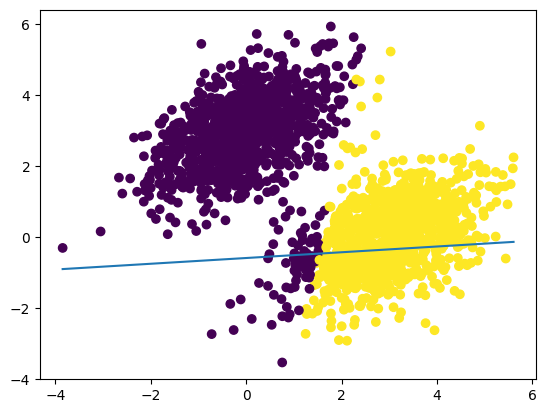

In [30]:
plt.plot(  (inputs[:,0].min(), inputs[:,0].max()), (start,end) )
plt.scatter(inputs[:,0],inputs[:,1], c=predict[:,0]>0.5)
plt.show()

In [31]:
# 정확도.... 
# 0.5 > 1  else  0
print(predict.shape)
# for i in predict:
#     print(float(i))
conver_predict = [1 if float(i) > 0.5 else 0 for i in predict]
print(np.array(conver_predict).shape, targets.shape)
(np.expand_dims(conver_predict,axis=-1) == targets).sum() / targets.shape[0]



(2000, 1)
(2000,) (2000, 1)


0.9605

In [32]:
# Layer 서브클래스로 Dense 층 구현

In [33]:
from tensorflow import keras

In [34]:
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()  # 부모생성자 호출
        self.units = units
        self.activation = activation        
    def build(self, input_shape):
        print("build........")
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim,self.units), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zero')
    def call(self,inputs):
        print("call........")
        y = tf.matmul(inputs,self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [35]:
print(1)
dense1 = SimpleDense(units=32, activation=tf.nn.relu)
print(2)
input_tensor = tf.ones(shape = (2,784))
print(3)
output_tensor = dense1(input_tensor)
print(4)
output_tensor.shape

1
2
3
build........
call........
4


TensorShape([2, 32])

In [36]:
# 동적으로 층을 만들기
from tensorflow.keras import layers
layer = layers.Dense(32,activation='relu')

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential(
    [
        layers.Dense(32,activation='relu'),
        layers.Dense(32)
    ]
)

In [38]:
model = models.Sequential(
    [
        SimpleDense(32,activation=tf.nn.relu),
        SimpleDense(64,activation=tf.nn.relu),
        SimpleDense(32,activation=tf.nn.relu),
        SimpleDense(10,activation=tf.nn.softmax)
    ]
)

In [39]:
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.RMSprop()
              ,loss=keras.losses.MeanSquaredError()
              ,metrics=[keras.metrics.BinaryAccuracy()])

In [42]:
histoy = model.fit(
    inputs,targets, epochs=5, batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 8ms/step - loss: 0.4100 - binary_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.4100 - binary_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 0s 10ms/step - loss: 0.4100 - binary_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.4100 - binary_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 0s 11ms/step - loss: 0.4100 - binary_accuracy: 0.5000


In [41]:
histoy.history

{'loss': [0.4099999964237213,
  0.4099999964237213,
  0.4099999964237213,
  0.4100000262260437,
  0.4099999964237213],
 'binary_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}